<a href="https://colab.research.google.com/github/mahfuzaebnatdisha/FIFA-Win/blob/main/FIFA_win_predic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [77]:
from google.colab import drive

In [78]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
FIFA = pd.DataFrame()
for i in range(1930,1939,4):
    temp = pd.read_csv('/content/gdrive/My Drive/Data/world-cup-dataset/FIFA - '+str(i)+'.csv') 
    FIFA = pd.concat([FIFA,temp],axis=0,ignore_index=True)

In [80]:
for i in range(1950,2019,4):
    temp = pd.read_csv('/content/gdrive/My Drive/Data/world-cup-dataset/FIFA - '+str(i)+'.csv')
    FIFA = pd.concat([FIFA,temp],axis=0,ignore_index=True)

In [81]:
#Data inspection and cleaning

In [82]:
FIFA.head()

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Uruguay,4,4,0,0,15,3,12,8
1,2,Argentina,5,4,0,1,18,9,9,8
2,3,United States,3,2,0,1,7,6,1,4
3,4,Yugoslavia,3,2,0,1,7,7,0,4
4,5,Chile,3,2,0,1,5,3,2,4


In [83]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         457 non-null    int64 
 1   Team             457 non-null    object
 2   Games Played     457 non-null    int64 
 3   Win              457 non-null    int64 
 4   Draw             457 non-null    int64 
 5   Loss             457 non-null    int64 
 6   Goals For        457 non-null    int64 
 7   Goals Against    457 non-null    int64 
 8   Goal Difference  457 non-null    object
 9   Points           457 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 35.8+ KB


In [85]:
FIFA_summary = pd.read_csv('/content/gdrive/My Drive/Data/world-cup-dataset/FIFA - World Cup Summary.csv')
FIFA_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [86]:
FIFA['Goal Difference'].value_counts()

0      58
−1     58
−2     47
−3     44
2      32
1      29
−4     21
4      18
3      18
−5     16
5      14
−6     14
6      12
8      10
−8      8
9       8
7       7
−7      7
11      6
10      5
−9      5
12      4
−12     3
−10     3
14      2
17      1
16      1
-2      1
−16     1
-1      1
−14     1
13      1
−11     1
Name: Goal Difference, dtype: int64

In [87]:
FIFA['Goal Difference'] = FIFA['Goal Difference'].apply(lambda x: -int(x[1]) if x[0] in ['−','-'] else int(x))

In [88]:
FIFA['Goal Difference'].describe()

count    457.000000
mean       0.214442
std        4.458135
min       -9.000000
25%       -3.000000
50%       -1.000000
75%        2.000000
max       17.000000
Name: Goal Difference, dtype: float64

In [89]:
FIFA['Team'].value_counts()

Brazil               21
Italy                18
Argentina            17
Mexico               16
Spain                15
                     ..
Israel*               1
Wales                 1
Dutch East Indies     1
Cuba                  1
Panama                1
Name: Team, Length: 86, dtype: int64

In [90]:
FIFA['Team'] = FIFA['Team'].apply(lambda x: 'Germany' if x in ['West Germany', 'East Germany'] else x)

In [91]:
FIFA['Position'].value_counts()

9     23
13    22
1     21
3     21
4     21
5     21
6     21
7     21
8     21
10    21
2     21
12    21
15    19
11    19
14    18
16    18
18    11
22    10
24    10
23    10
17    10
21    10
20    10
19     9
25     7
28     7
27     6
30     6
31     6
32     6
26     5
29     5
Name: Position, dtype: int64

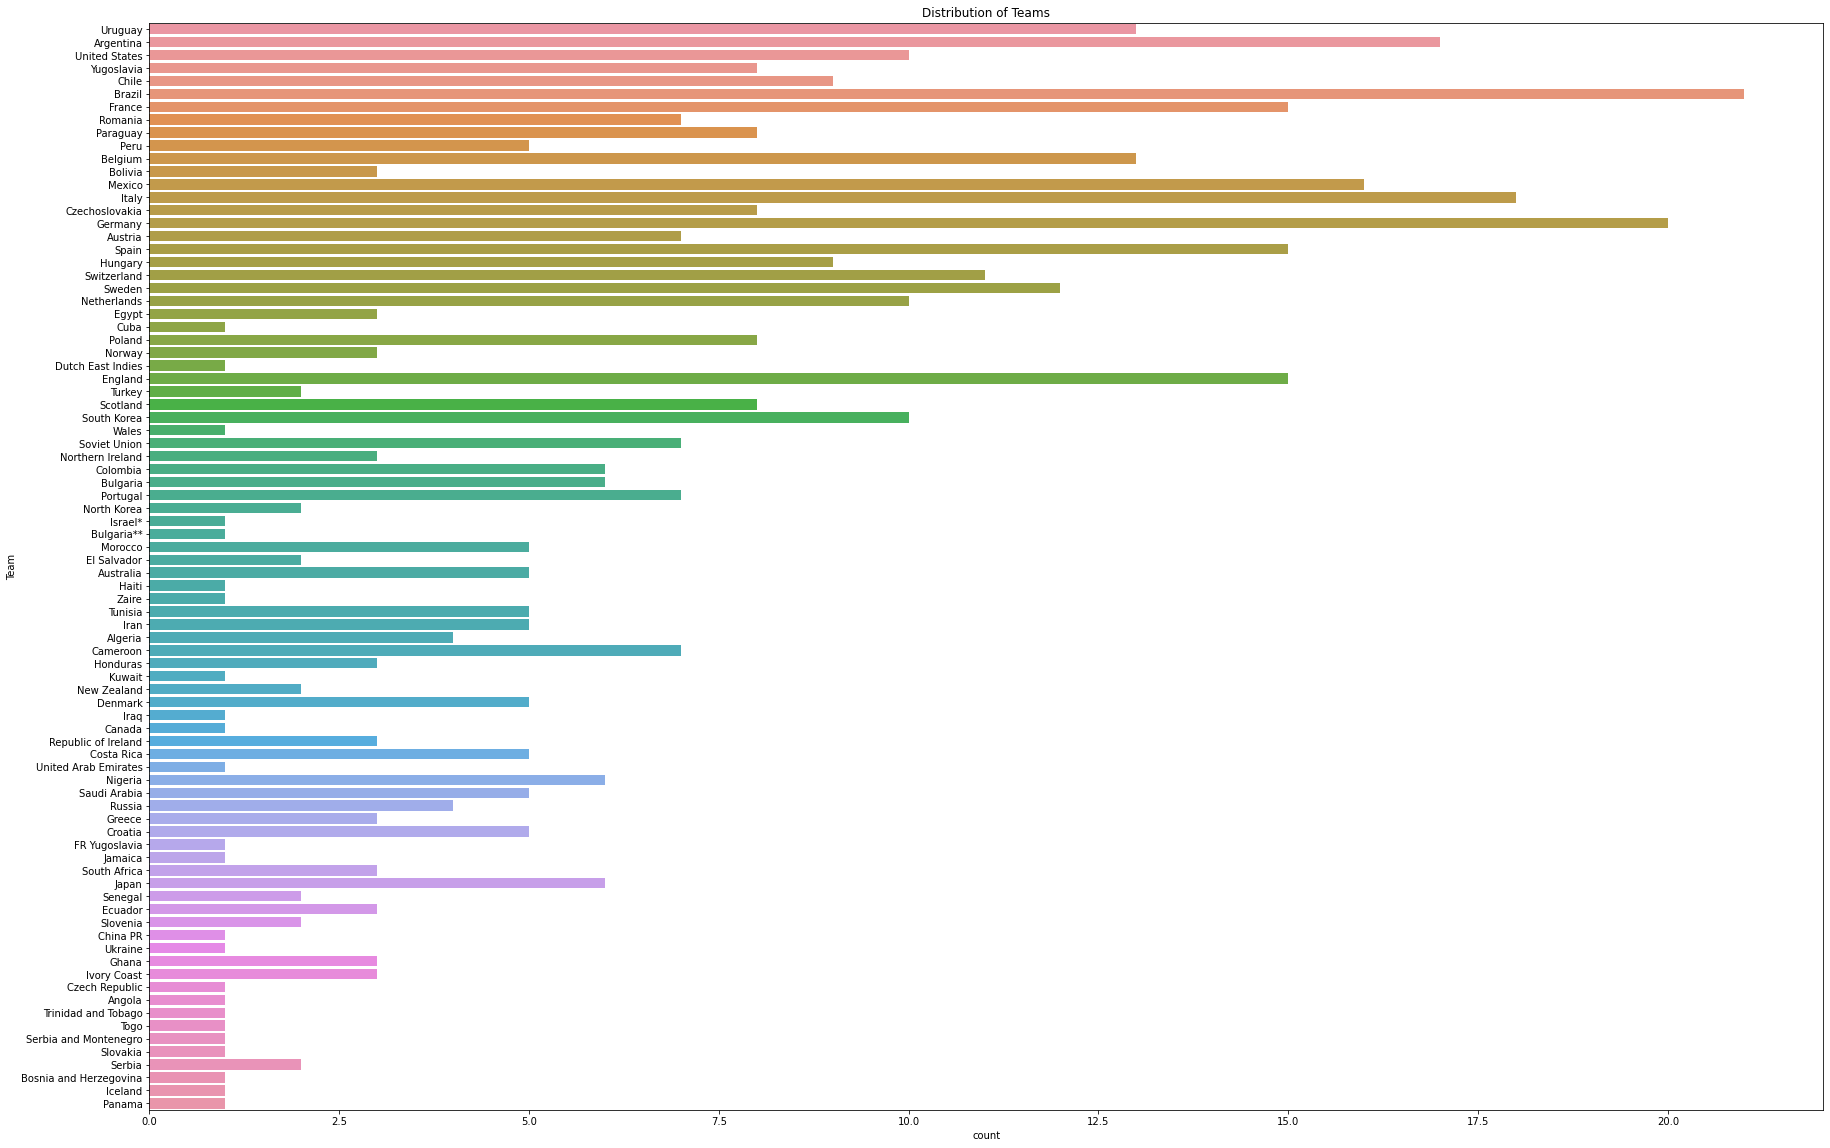

In [92]:
plt.figure(figsize=(30,20))
sns.countplot(y=FIFA['Team'])
plt.title('Distribution of Teams')
plt.show()

In [93]:
Count = list(FIFA['Team'].value_counts())
Count = np.array(Count)
Count

array([21, 20, 18, 17, 16, 15, 15, 15, 13, 13, 12, 11, 10, 10, 10,  9,  9,
        8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  6,  6,  6,  6,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [94]:
FIFA['Count'] = 1

In [95]:
def ag(x):
    lis = list(x.columns)
    lis.remove('Count')
    lis.remove('Team')
    dic = dict()
    for i in lis:
        dic[i] = 'mean'
    dic['Count'] = 'sum'
    return dic
    
FIFA = FIFA.groupby(['Team']).agg(ag(FIFA))
FIFA.head()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Count
Team,,,,,,,,,,
Algeria,19.250000,3.250000,0.750000,0.750000,1.750000,3.250000,4.750000,-1.500000,2.500000,4
Angola,23.000000,3.000000,0.000000,2.000000,1.000000,1.000000,2.000000,-1.000000,2.000000,1
Argentina,7.294118,4.764706,2.529412,0.882353,1.352941,8.058824,5.470588,2.588235,7.058824,17
Australia,21.600000,3.200000,0.400000,0.800000,2.000000,2.600000,6.200000,-3.600000,2.000000,5
Austria,11.142857,4.142857,1.714286,0.571429,1.857143,6.142857,6.714286,-0.571429,4.000000,7


In [96]:
FIFA.head()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Count
Team,,,,,,,,,,
Algeria,19.250000,3.250000,0.750000,0.750000,1.750000,3.250000,4.750000,-1.500000,2.500000,4
Angola,23.000000,3.000000,0.000000,2.000000,1.000000,1.000000,2.000000,-1.000000,2.000000,1
Argentina,7.294118,4.764706,2.529412,0.882353,1.352941,8.058824,5.470588,2.588235,7.058824,17
Australia,21.600000,3.200000,0.400000,0.800000,2.000000,2.600000,6.200000,-3.600000,2.000000,5
Austria,11.142857,4.142857,1.714286,0.571429,1.857143,6.142857,6.714286,-0.571429,4.000000,7


In [97]:
FIFA_Regular = FIFA[FIFA.Count>=13]
FIFA_Irregular = FIFA[FIFA.Count<13]

In [98]:
FIFA_Regular.head()
FIFA_Regular =FIFA_Regular.drop('Count',axis=1)

In [99]:
FIFA_Regular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Argentina to Uruguay
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         10 non-null     float64
 1   Games Played     10 non-null     float64
 2   Win              10 non-null     float64
 3   Draw             10 non-null     float64
 4   Loss             10 non-null     float64
 5   Goals For        10 non-null     float64
 6   Goals Against    10 non-null     float64
 7   Goal Difference  10 non-null     float64
 8   Points           10 non-null     float64
dtypes: float64(9)
memory usage: 800.0+ bytes


In [100]:
FIFA_Irregular.head()
FIFA_Irregular = FIFA_Irregular.drop('Count',axis=1)

In [101]:
FIFA_Irregular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, Algeria to Zaire
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         74 non-null     float64
 1   Games Played     74 non-null     float64
 2   Win              74 non-null     float64
 3   Draw             74 non-null     float64
 4   Loss             74 non-null     float64
 5   Goals For        74 non-null     float64
 6   Goals Against    74 non-null     float64
 7   Goal Difference  74 non-null     float64
 8   Points           74 non-null     float64
dtypes: float64(9)
memory usage: 5.8+ KB


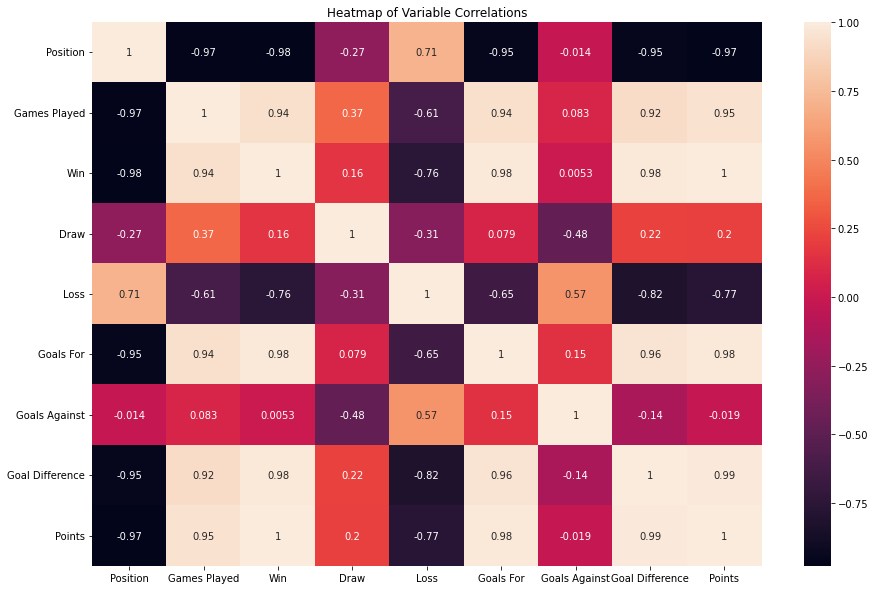

In [102]:
plt.figure(figsize=(15,10))
sns.heatmap(FIFA_Regular.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

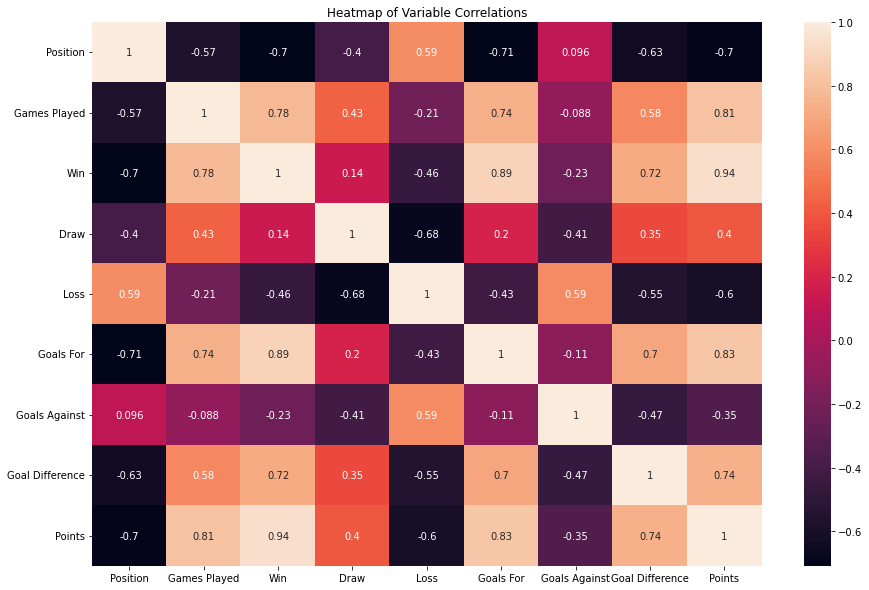

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(FIFA_Irregular.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

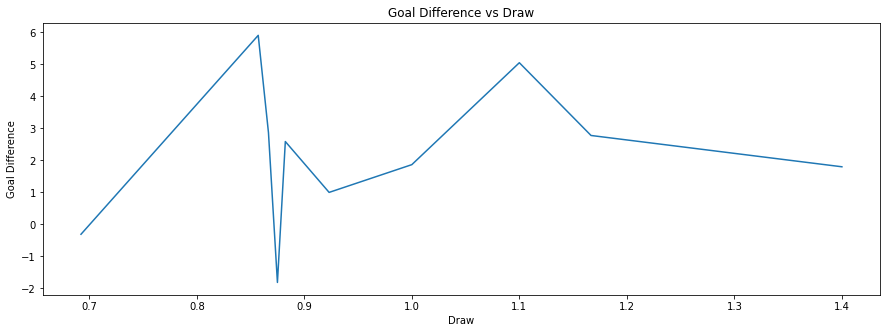

In [104]:
#FIFA_Regular
plt.figure(figsize=(15,5))
sns.lineplot(x='Draw',y='Goal Difference',data=FIFA_Regular)
plt.title('Goal Difference vs Draw')
plt.xlabel('Draw')
plt.ylabel('Goal Difference')
plt.show()

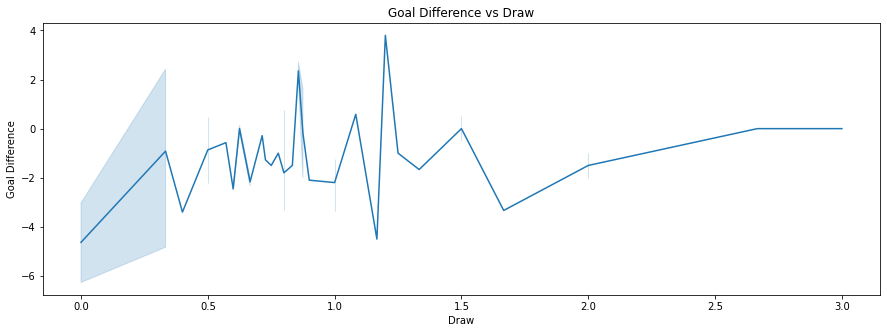

In [105]:
#FIFA_Irregular
plt.figure(figsize=(15,5))
sns.lineplot(x='Draw',y='Goal Difference',data=FIFA_Irregular)
plt.title('Goal Difference vs Draw')
plt.xlabel('Draw')
plt.ylabel('Goal Difference')
plt.show()

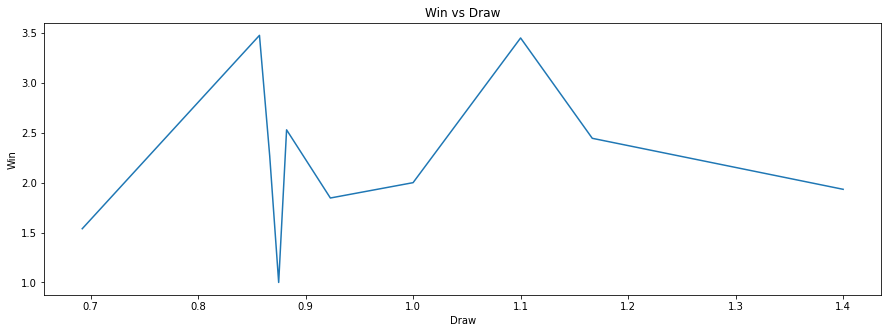

In [106]:
#FIFA_Regular
plt.figure(figsize=(15,5))
sns.lineplot(x='Draw',y='Win',data=FIFA_Regular)
plt.title('Win vs Draw')
plt.xlabel('Draw')
plt.ylabel('Win')
plt.show()

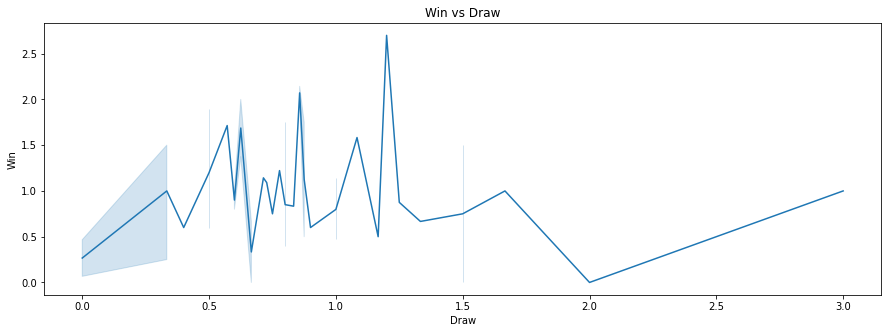

In [107]:
#FIFA_Irregular
plt.figure(figsize=(15,5))
sns.lineplot(x='Draw',y='Win',data=FIFA_Irregular)
plt.title('Win vs Draw')
plt.xlabel('Draw')
plt.ylabel('Win')
plt.show()

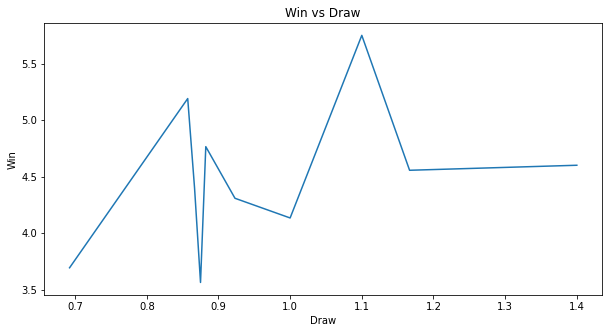

In [108]:
#FIFA_Regular
plt.figure(figsize=(10,5))
sns.lineplot(x='Draw',y='Games Played',data=FIFA_Regular)
plt.title('Win vs Draw')
plt.xlabel('Draw')
plt.ylabel('Win')
plt.show()

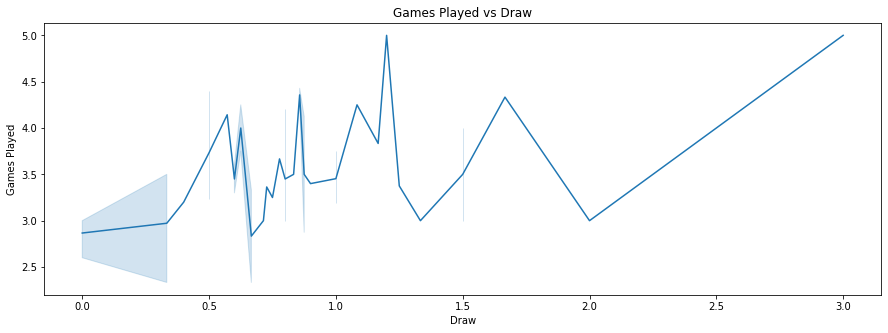

In [109]:
#FIFA_Irregular
plt.figure(figsize=(15,5))
sns.lineplot(x='Draw',y='Games Played',data=FIFA_Irregular)
plt.title('Games Played vs Draw')
plt.xlabel('Draw')
plt.ylabel('Games Played')
plt.show()

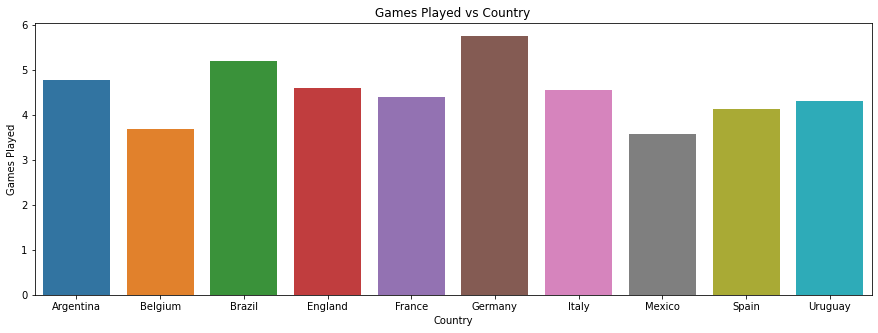

In [110]:
#FIFA_Regular
plt.figure(figsize=(15,5))
sns.barplot(x=FIFA_Regular.index,y='Games Played',data=FIFA_Regular)
plt.title('Games Played vs Country')
plt.xlabel('Country')
plt.ylabel('Games Played')
plt.show()

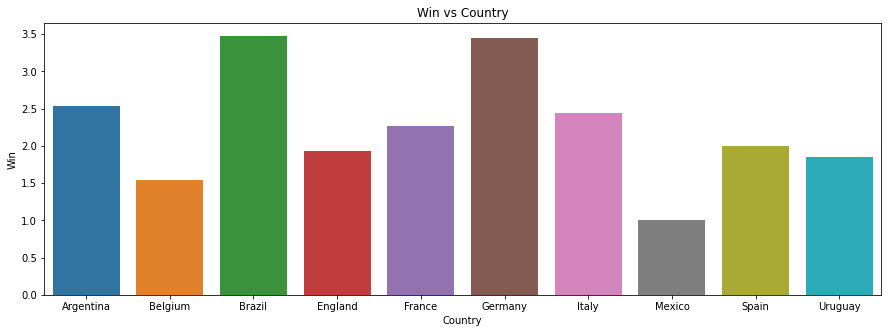

In [111]:
#FIFA_Regular
plt.figure(figsize=(15,5))
sns.barplot(x=FIFA_Regular.index,y='Win',data=FIFA_Regular)
plt.title('Win vs Country')
plt.xlabel('Country')
plt.ylabel('Win')
plt.show()

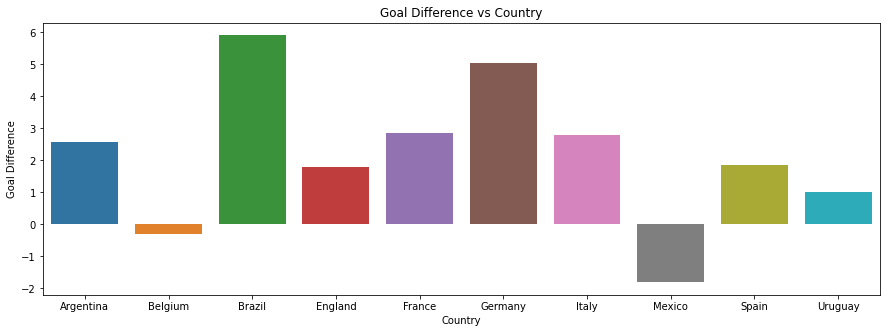

In [112]:
#FIFA_Regular
plt.figure(figsize=(15,5))
sns.barplot(x=FIFA_Regular.index,y='Goal Difference',data=FIFA_Regular)
plt.title('Goal Difference vs Country')
plt.xlabel('Country')
plt.ylabel('Goal Difference')
plt.show()

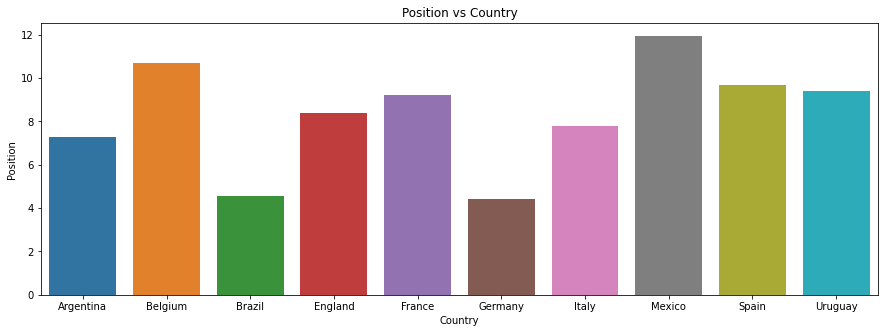

In [113]:
#FIFA_Regular
plt.figure(figsize=(15,5))
sns.barplot(x=FIFA_Regular.index,y='Position',data=FIFA_Regular)
plt.title('Position vs Country')
plt.xlabel('Country')
plt.ylabel('Position')
plt.show()

In [114]:
FIFA_Regular.head()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Team,,,,,,,,,
Argentina,7.294118,4.764706,2.529412,0.882353,1.352941,8.058824,5.470588,2.588235,7.058824
Belgium,10.692308,3.692308,1.538462,0.692308,1.461538,5.230769,5.538462,-0.307692,4.769231
Brazil,4.571429,5.190476,3.476190,0.857143,0.857143,10.904762,5.000000,5.904762,9.190476
England,8.400000,4.600000,1.933333,1.400000,1.266667,6.066667,4.266667,1.800000,6.000000
France,9.200000,4.400000,2.266667,0.866667,1.266667,8.000000,5.133333,2.866667,6.666667


In [115]:
FIFA_Irregular.head()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Team,,,,,,,,,
Algeria,19.250000,3.250000,0.750000,0.750000,1.750000,3.250000,4.750000,-1.500000,2.500000
Angola,23.000000,3.000000,0.000000,2.000000,1.000000,1.000000,2.000000,-1.000000,2.000000
Australia,21.600000,3.200000,0.400000,0.800000,2.000000,2.600000,6.200000,-3.600000,2.000000
Austria,11.142857,4.142857,1.714286,0.571429,1.857143,6.142857,6.714286,-0.571429,4.000000
Bolivia,15.333333,2.000000,0.000000,0.333333,1.666667,0.333333,6.666667,-6.333333,0.333333


In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
col = FIFA_Regular.columns
FIFA_Regular_clust = scaler.fit_transform(FIFA_Regular)
FIFA_Regular_clust = pd.DataFrame(FIFA_Regular_clust,columns=col)
print(FIFA_Regular_clust.head())
print(FIFA_Regular_clust.info())

   Position  Games Played       Win      Draw      Loss  Goals For  \
0 -0.450150      0.434463  0.380409 -0.494972  0.337891   0.294716   
1  1.023084     -1.297257 -0.961370 -1.496023  0.784989  -0.953118   
2 -1.630530      1.122001  1.662379 -0.627765 -1.703323   1.550440   
3  0.029289      0.168494 -0.426700  2.231698 -0.017303  -0.584292   
4  0.376117     -0.154468  0.024644 -0.577599 -0.017303   0.268761   

   Goals Against  Goal Difference    Points  
0       0.281053         0.191619  0.331301  
1       0.377963        -1.146031 -0.992816  
2      -0.390859         1.723548  1.564079  
3      -1.437922        -0.172472 -0.281038  
4      -0.200484         0.320229  0.104509  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         10 non-null     float64
 1   Games Played     10 non-null     float64
 2   Win          

In [130]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [132]:
hopkins(FIFA_Regular_clust)

0.6195091800677809

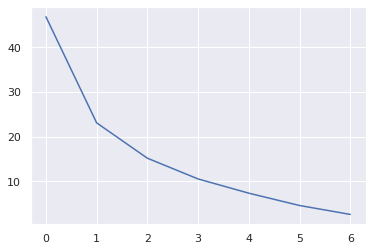

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(FIFA_Regular_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [134]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(FIFA_Regular_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(FIFA_Regular_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4207800579311806
For n_clusters=3, the silhouette score is 0.3646067711386097
For n_clusters=4, the silhouette score is 0.3125510094242091
For n_clusters=5, the silhouette score is 0.23890875195177436
For n_clusters=6, the silhouette score is 0.15892134443187372
For n_clusters=7, the silhouette score is 0.11355393974786909
For n_clusters=8, the silhouette score is 0.08996279984786629


In [135]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(FIFA_Regular_clust)

KMeans(max_iter=100, n_clusters=3)

In [136]:
FIFA_Regular['Cluster_ID'] = kmeans.labels_

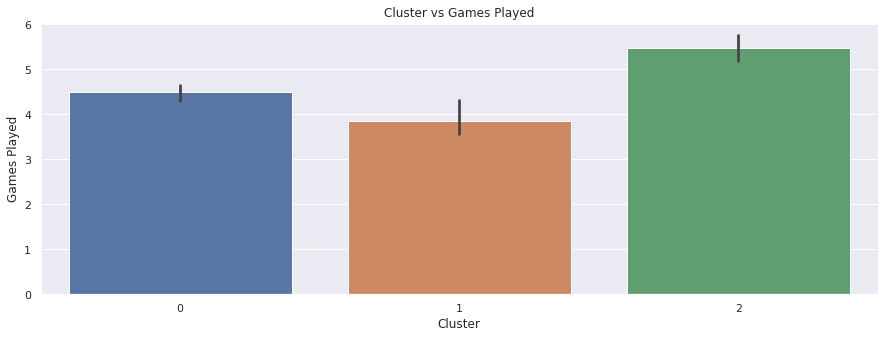

In [137]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Games Played',palette='deep',data=FIFA_Regular)
plt.title('Cluster vs Games Played')
plt.xlabel('Cluster')
plt.ylabel('Games Played')
plt.show()

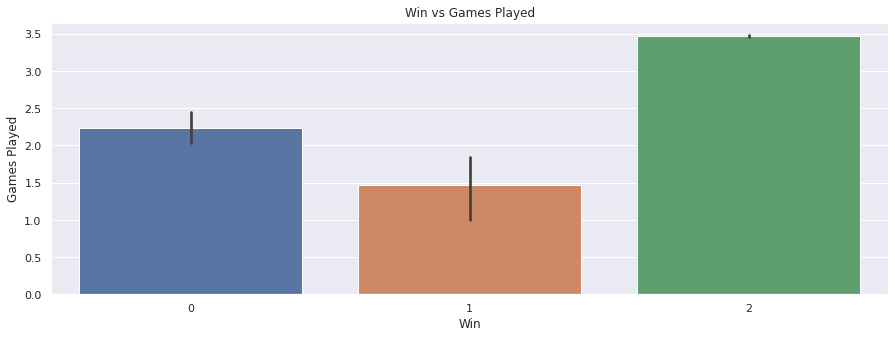

In [138]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Win',palette='deep',data=FIFA_Regular)
plt.title('Win vs Games Played')
plt.xlabel('Win')
plt.ylabel('Games Played')
plt.show()

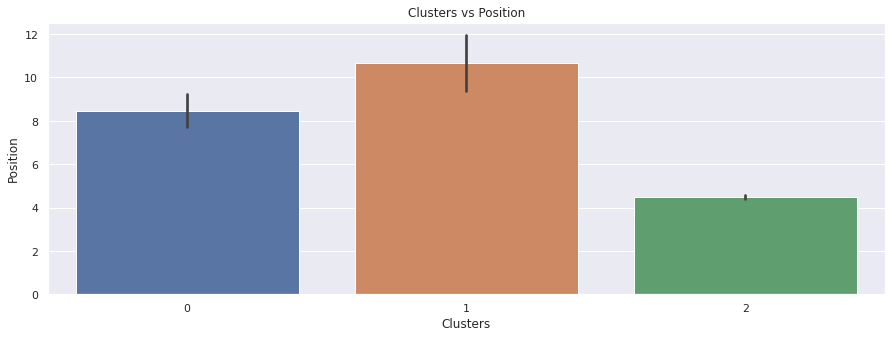

In [139]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Position',palette='deep',data=FIFA_Regular)
plt.title('Clusters vs Position')
plt.xlabel('Clusters')
plt.ylabel('Position')
plt.show()

In [140]:
print('Cluster 1 :', list(FIFA_Regular[FIFA_Regular.Cluster_ID == 0].index))
print('Cluster 2 :', list(FIFA_Regular[FIFA_Regular.Cluster_ID == 1].index))
print('Cluster 3 :', list(FIFA_Regular[FIFA_Regular.Cluster_ID == 2].index))

Cluster 1 : ['Argentina', 'England', 'France', 'Italy', 'Spain']
Cluster 2 : ['Belgium', 'Mexico', 'Uruguay']
Cluster 3 : ['Brazil', 'Germany']


In [141]:
scaler = StandardScaler()
col = FIFA_Irregular.columns
FIFA_Irregular_clust = scaler.fit_transform(FIFA_Irregular)
FIFA_Irregular_clust = pd.DataFrame(FIFA_Irregular,columns=col)
print(FIFA_Irregular_clust.head())
print(FIFA_Irregular_clust.info())

            Position  Games Played       Win      Draw      Loss  Goals For  \
Team                                                                          
Algeria    19.250000      3.250000  0.750000  0.750000  1.750000   3.250000   
Angola     23.000000      3.000000  0.000000  2.000000  1.000000   1.000000   
Australia  21.600000      3.200000  0.400000  0.800000  2.000000   2.600000   
Austria    11.142857      4.142857  1.714286  0.571429  1.857143   6.142857   
Bolivia    15.333333      2.000000  0.000000  0.333333  1.666667   0.333333   

           Goals Against  Goal Difference    Points  
Team                                                 
Algeria         4.750000        -1.500000  2.500000  
Angola          2.000000        -1.000000  2.000000  
Australia       6.200000        -3.600000  2.000000  
Austria         6.714286        -0.571429  4.000000  
Bolivia         6.666667        -6.333333  0.333333  
<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, Algeria to 

In [142]:
hopkins(FIFA_Irregular_clust)

0.732663303953267

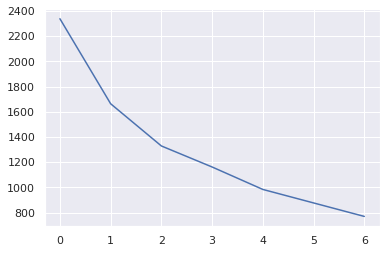

In [143]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(FIFA_Irregular_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [144]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(FIFA_Irregular_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(FIFA_Irregular_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.427751520775045
For n_clusters=3, the silhouette score is 0.3756256244108486
For n_clusters=4, the silhouette score is 0.33924023516795215
For n_clusters=5, the silhouette score is 0.31919293691656564
For n_clusters=6, the silhouette score is 0.2831483683402146
For n_clusters=7, the silhouette score is 0.28911087797327806
For n_clusters=8, the silhouette score is 0.2828422837806189


In [145]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(FIFA_Irregular_clust)

KMeans(max_iter=100, n_clusters=3)

In [146]:
FIFA_Irregular['Cluster_ID'] = kmeans.labels_

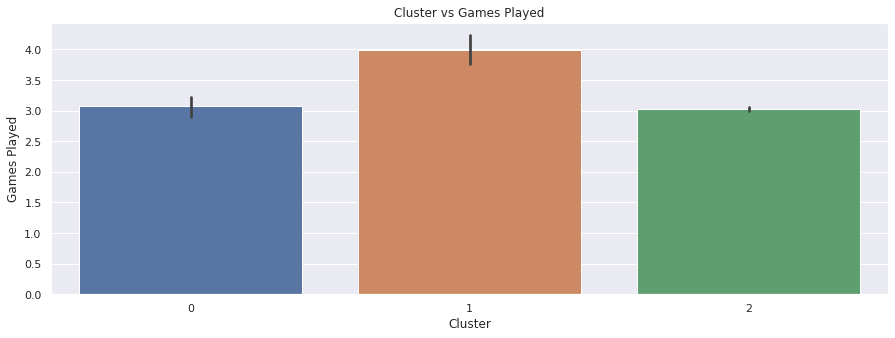

In [147]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Games Played',palette='deep',data=FIFA_Irregular)
plt.title('Cluster vs Games Played')
plt.xlabel('Cluster')
plt.ylabel('Games Played')
plt.show()

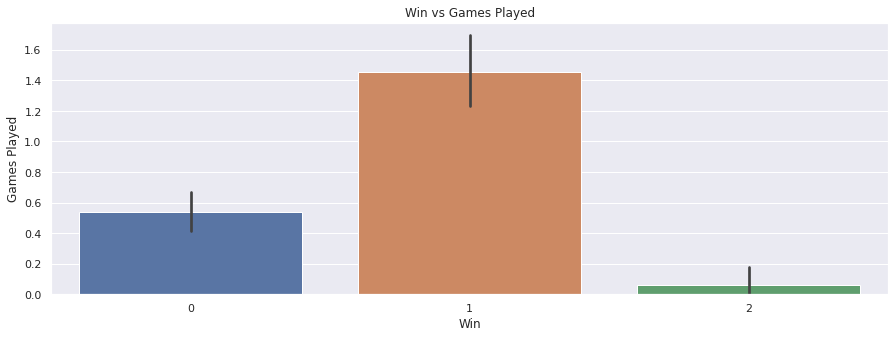

In [148]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Win',palette='deep',data=FIFA_Irregular)
plt.title('Win vs Games Played')
plt.xlabel('Win')
plt.ylabel('Games Played')
plt.show()

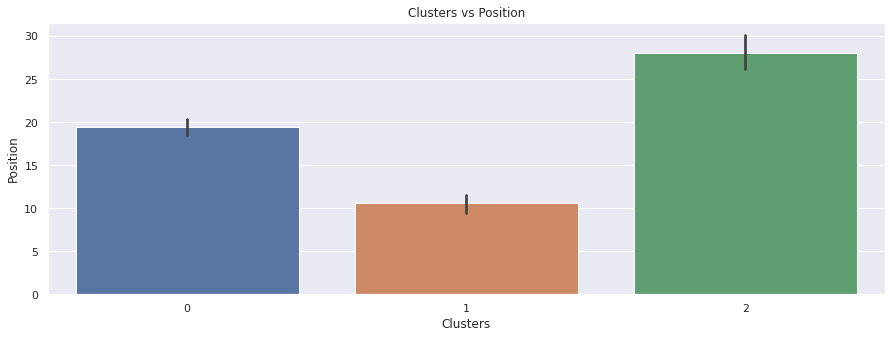

In [149]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Position',palette='deep',data=FIFA_Irregular)
plt.title('Clusters vs Position')
plt.xlabel('Clusters')
plt.ylabel('Position')
plt.show()

In [150]:
print('Cluster 1 :', list(FIFA_Irregular[FIFA_Irregular.Cluster_ID == 0].index))

Cluster 1 : ['Algeria', 'Angola', 'Australia', 'Bolivia', 'Bosnia and Herzegovina', 'Bulgaria', 'Cameroon', 'Costa Rica', 'Czech Republic', 'Dutch East Indies', 'Ecuador', 'Egypt', 'El Salvador', 'Greece', 'Haiti', 'Iran', 'Iraq', 'Ivory Coast', 'Jamaica', 'Japan', 'Kuwait', 'Morocco', 'New Zealand', 'Nigeria', 'North Korea', 'Norway', 'Russia', 'Scotland', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Tunisia', 'United States', 'Zaire']


In [151]:
print('Cluster 2 :', list(FIFA_Irregular[FIFA_Irregular.Cluster_ID == 1].index))

Cluster 2 : ['Austria', 'Bulgaria**', 'Chile', 'Colombia', 'Croatia', 'Cuba', 'Czechoslovakia', 'Denmark', 'FR Yugoslavia', 'Ghana', 'Hungary', 'Israel*', 'Netherlands', 'Northern Ireland', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Republic of Ireland', 'Romania', 'Senegal', 'Soviet Union', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'Wales', 'Yugoslavia']


In [152]:
print('Cluster 3 :', list(FIFA_Irregular[FIFA_Irregular.Cluster_ID == 2].index))

Cluster 3 : ['Canada', 'China PR', 'Honduras', 'Iceland', 'Panama', 'Saudi Arabia', 'Serbia and Montenegro', 'Togo', 'Trinidad and Tobago', 'United Arab Emirates']


In [154]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, Algeria to Zaire
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         84 non-null     float64
 1   Games Played     84 non-null     float64
 2   Win              84 non-null     float64
 3   Draw             84 non-null     float64
 4   Loss             84 non-null     float64
 5   Goals For        84 non-null     float64
 6   Goals Against    84 non-null     float64
 7   Goal Difference  84 non-null     float64
 8   Points           84 non-null     float64
 9   Count            84 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 7.2+ KB


In [155]:
scaler = StandardScaler()
FIFA_clust = FIFA.drop('Count',axis=1)
col = FIFA_clust.columns
FIFA_clust = scaler.fit_transform(FIFA_clust)
FIFA_clust = pd.DataFrame(FIFA_clust,columns=col)
print(FIFA_clust.head())
print(FIFA_clust.info())

   Position  Games Played       Win      Draw      Loss  Goals For  \
0  0.454876     -0.382458 -0.284338 -0.065449 -0.022035  -0.292350   
1  1.006089     -0.710364 -1.165210  2.162215 -1.316020  -1.170511   
2 -1.302520      1.604269  1.805574  0.170421 -0.707086   1.584505   
3  0.800303     -0.448039 -0.695412  0.023657  0.409294  -0.546041   
4 -0.736793      0.788636  0.848211 -0.383687  0.162820   0.836715   

   Goals Against  Goal Difference    Points  
0      -0.552961        -0.008872 -0.362954  
1      -1.747173         0.158824 -0.578399  
2      -0.240039         1.362287  1.601396  
3       0.076715        -0.713193 -0.578399  
4       0.300048         0.302563  0.283381  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         84 non-null     float64
 1   Games Played     84 non-null     float64
 2   Win         

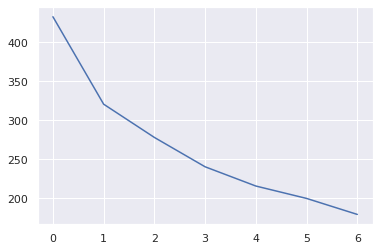

In [156]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(FIFA_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [157]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(FIFA_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(FIFA_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.35385878552589095
For n_clusters=3, the silhouette score is 0.3349136838995158
For n_clusters=4, the silhouette score is 0.24782308282696214
For n_clusters=5, the silhouette score is 0.25847062367058016
For n_clusters=6, the silhouette score is 0.26501222594479074
For n_clusters=7, the silhouette score is 0.23274023518217404
For n_clusters=8, the silhouette score is 0.21021613047687776


In [158]:
kmeans = KMeans(n_clusters=4,max_iter=100)
kmeans.fit(FIFA_clust)

KMeans(max_iter=100, n_clusters=4)

In [159]:
FIFA['Cluster_ID'] = kmeans.labels_

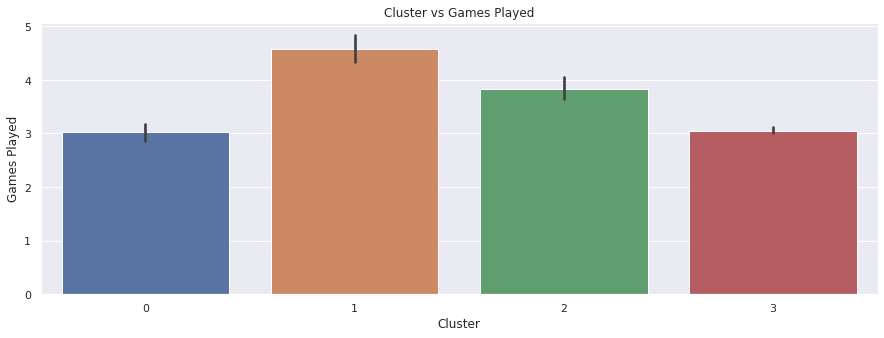

In [160]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Games Played',palette='deep',data=FIFA)
plt.title('Cluster vs Games Played')
plt.xlabel('Cluster')
plt.ylabel('Games Played')
plt.show()

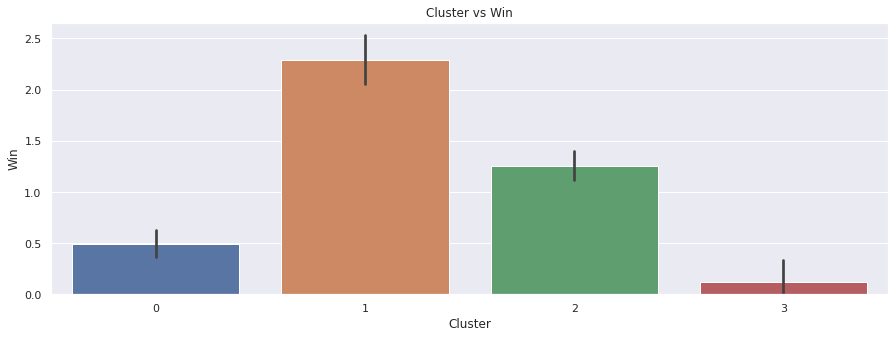

In [161]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Win',palette='deep',data=FIFA)
plt.title('Cluster vs Win')
plt.xlabel('Cluster')
plt.ylabel('Win')
plt.show()

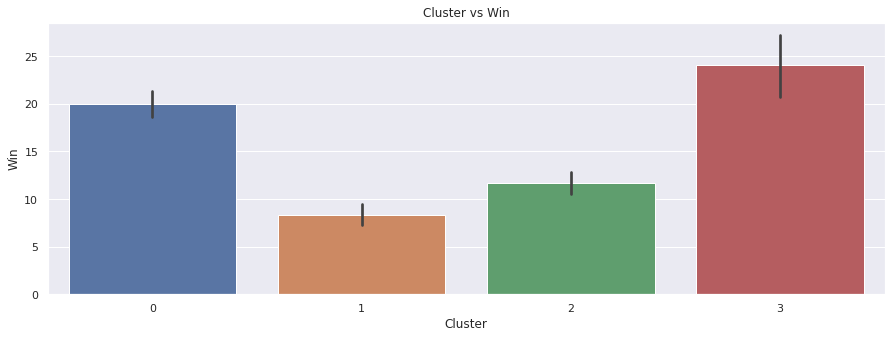

In [162]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Position',palette='deep',data=FIFA)
plt.title('Cluster vs Win')
plt.xlabel('Cluster')
plt.ylabel('Win')
plt.show()

In [163]:
print('Cluster 1 :', list(FIFA[FIFA.Cluster_ID == 0].index))

Cluster 1 : ['Algeria', 'Angola', 'Australia', 'Bolivia', 'Bosnia and Herzegovina', 'Bulgaria', 'Bulgaria**', 'Cameroon', 'Costa Rica', 'Czech Republic', 'Dutch East Indies', 'Ecuador', 'Egypt', 'Greece', 'Honduras', 'Iceland', 'Iran', 'Israel*', 'Ivory Coast', 'Japan', 'Kuwait', 'Morocco', 'New Zealand', 'Nigeria', 'Norway', 'Saudi Arabia', 'Scotland', 'Serbia', 'Slovenia', 'South Africa', 'South Korea', 'Trinidad and Tobago', 'Tunisia', 'United States']


In [164]:
print('Cluster 2 :', list(FIFA[FIFA.Cluster_ID == 1].index))

Cluster 2 : ['Argentina', 'Brazil', 'Croatia', 'England', 'FR Yugoslavia', 'France', 'Germany', 'Hungary', 'Italy', 'Netherlands', 'Portugal', 'Soviet Union', 'Spain', 'Turkey', 'Ukraine', 'Uruguay', 'Yugoslavia']


In [165]:
print('Cluster 3 :', list(FIFA[FIFA.Cluster_ID == 2].index))

Cluster 3 : ['Austria', 'Belgium', 'Chile', 'Colombia', 'Cuba', 'Czechoslovakia', 'Denmark', 'Ghana', 'Mexico', 'Northern Ireland', 'Paraguay', 'Peru', 'Poland', 'Republic of Ireland', 'Romania', 'Russia', 'Senegal', 'Slovakia', 'Sweden', 'Switzerland', 'Wales']


In [166]:
print('Cluster 4 :', list(FIFA[FIFA.Cluster_ID == 3].index))

Cluster 4 : ['Canada', 'China PR', 'El Salvador', 'Haiti', 'Iraq', 'Jamaica', 'North Korea', 'Panama', 'Serbia and Montenegro', 'Togo', 'United Arab Emirates', 'Zaire']


In [167]:
FIFA_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [168]:
FIFA_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                22 non-null     int64  
 1   HOST                22 non-null     object 
 2   CHAMPION            22 non-null     object 
 3   RUNNER UP           22 non-null     object 
 4   THIRD PLACE         22 non-null     object 
 5   TEAMS               22 non-null     int64  
 6   MATCHES PLAYED      22 non-null     int64  
 7   GOALS SCORED        22 non-null     int64  
 8   AVG GOALS PER GAME  22 non-null     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.7+ KB


In [169]:
FIFA_summary.temp = FIFA_summary.HOST+'_'+FIFA_summary.CHAMPION
FIFA_summary['Target'] = FIFA_summary.temp.apply(lambda x: 1 if x.split('_')[0] == x.split('_')[1] else 0)
FIFA_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME,Target
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6,1
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1,1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7,0
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0,0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4,0


In [170]:
FIFA_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                22 non-null     int64  
 1   HOST                22 non-null     object 
 2   CHAMPION            22 non-null     object 
 3   RUNNER UP           22 non-null     object 
 4   THIRD PLACE         22 non-null     object 
 5   TEAMS               22 non-null     int64  
 6   MATCHES PLAYED      22 non-null     int64  
 7   GOALS SCORED        22 non-null     int64  
 8   AVG GOALS PER GAME  22 non-null     float64
 9   Target              22 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.8+ KB


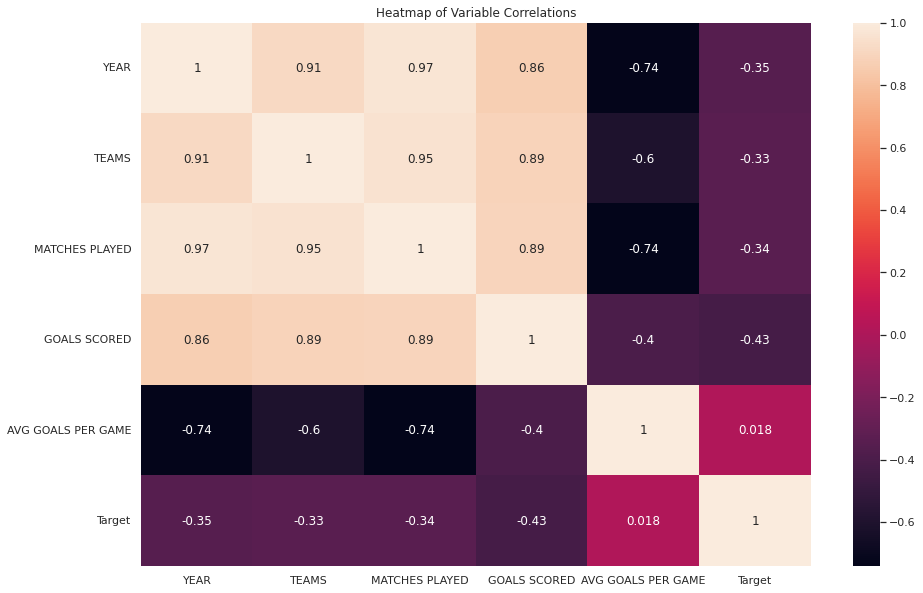

In [171]:
plt.figure(figsize=(15,10))
sns.heatmap(FIFA_summary[['YEAR','TEAMS','MATCHES PLAYED','GOALS SCORED','AVG GOALS PER GAME','Target']].corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [172]:
FIFA_summary['Target'].value_counts()

0    16
1     6
Name: Target, dtype: int64

In [173]:
X = FIFA_summary.drop(['HOST','CHAMPION','RUNNER UP','THIRD PLACE','Target'],axis=1)
y = FIFA_summary['Target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=100)

In [174]:
X_train.head()

,YEAR,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
13,1990,24,52,115,2.2
5,1958,16,35,126,3.6
2,1938,15,18,84,4.7
4,1954,16,26,140,5.4
14,1994,24,52,141,2.7


In [175]:
X_test.head()

,YEAR,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
21,2022,32,64,172,2.7
12,1986,24,52,132,2.5
9,1974,16,38,97,2.6
6,1962,16,32,89,2.8
20,2018,32,64,169,2.6


In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [177]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'n_estimators':[200],
          'max_depth':[3,6,10,15,20,25,30],
          'max_features':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 91 candidates, totalling 455 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 10, 15, 20, 25, 30],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                                          0.45, 0.5, 0.55, 0.6, 0.65, 0.7],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [178]:
Model_best = grid_search.best_estimator_

In [180]:
from sklearn.metrics import accuracy_score, plot_roc_curve

1.0


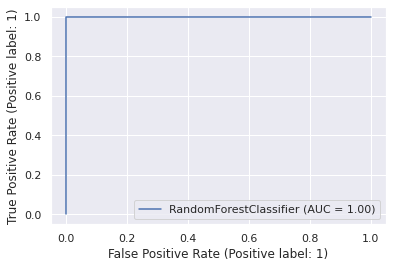

In [181]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

0.5454545454545454


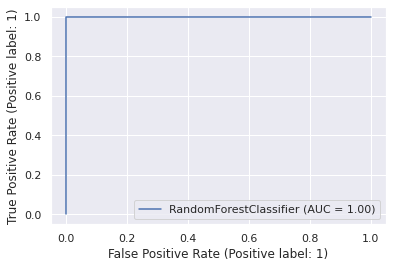

In [182]:
plot_roc_curve(Model_best,X_train,y_train)
y_test_pred = Model_best.predict(X_test)

print(accuracy_score(y_test,y_test_pred))

In [183]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_importance.sort_values(by='Importance',ascending=False)
Feature_importance

,Feature,Importance
0,YEAR,0.235929
1,TEAMS,0.101210
2,MATCHES PLAYED,0.152563
3,GOALS SCORED,0.289453
4,AVG GOALS PER GAME,0.220845
